<p id="part0"></p>

<p style="font-family: Arials; line-height: 2; font-size: 24px; font-weight: bold; letter-spacing: 2px; text-align: center; color: black">MALL CUSTOMER SEGMENTATION</p>


<p style="font-family: Arials; font-size: 16px;text-align: center;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Dataset ini mengenai segmentasi pelanggan mall yang diberikan untuk menunjang pembelajaran Machine Learning dengan bagaimana kita menerapkan Unsupervised Learning (PCA, K-Means & SOM) kedalam dataset ini yang nantinya akan mendapatkan hasil clustering yang berguna untuk analisis target pasar untuk suatu mall supermarket.</a></p>

<p style="font-family: Arials; font-size: 14px;text-align: center; font-weight: bold; font-style: normal;  letter-spacing: 2px;  line-height:1.3"> Senna Yoga | Avriono Aritonang | Farhan Nanda | Ayudya</a></p>

# 1. Import Library
<hr style="height: 0.5px; border: 0; background-color: #808080">

In [166]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 2. Load Dataset
<hr style="height: 0.5px; border: 0; background-color: #808080">

In [167]:
df = pd.read_csv('5. Mall_Customers.csv')

# 3. Exploratory Data Analyst (EDA)
<hr style="height: 0.5px; border: 0; background-color: #808080">

In [168]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Lalu setelah itu  kami ingin melihat dataset kami dengan modul df.head(), setelah kami menggunakan df.head() maka output nya akan memunculkan dataset nya sebanyak 5 baris pertama

In [169]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Lalu tahap berikutnya kami menggunakan modul pandas df.describe  digunakan untuk menampilkan ringkasan statistik deskriptif dari  dataset kami


In [170]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Pada tahap berikutnya kami menggunakan modul pandas isnull.sum() dimana modul ini akan mengecek null pada setiap kolom. setelah di cek modul ini akan meng count setiap nilai yang null

In [171]:
df.shape

(200, 5)

<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Untuk selanjutnya kami ingin melihat bentuk atau dimensi dari dataset yang akan kami olah dengan menggunakan df.shape(). Ternyata setelah modulnya dijalankan dapat dilihat bahwa dimensi dari dataset kami adalah (200,5)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [173]:
df.rename(columns={'Genre':'Gender','Annual Income (k$)':'Annual Income',
                     'Spending Score (1-100)':'Spending Score'},inplace=True)
df

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Pada  proses EDA ini kami ingin mengganti setiap kolom agar lebih mudah dibaca

## 3.1 Gender

<Axes: xlabel='Gender', ylabel='count'>

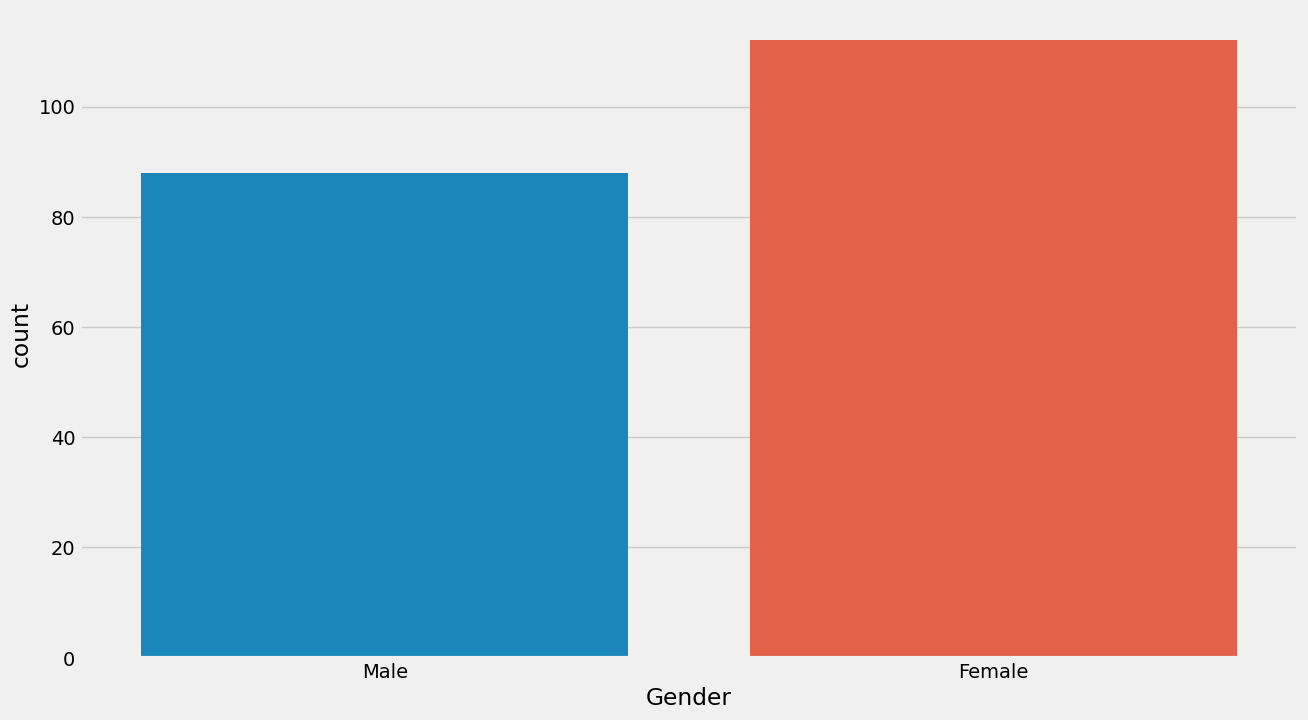

In [174]:
sns.countplot(x = 'Gender', data = df)

<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Selanjutnya kami ingin melihat perbandingan gender customer menggunakan bar chart dapat dilihat bahwa untuk customer nya sendiri lebih mendominasi oleh perempuan daripada laki laki

## 3.2 Age

C:\Users\Senna\AppData\Local\Temp\ipykernel_5124\3255828239.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age', ylabel='Density'>

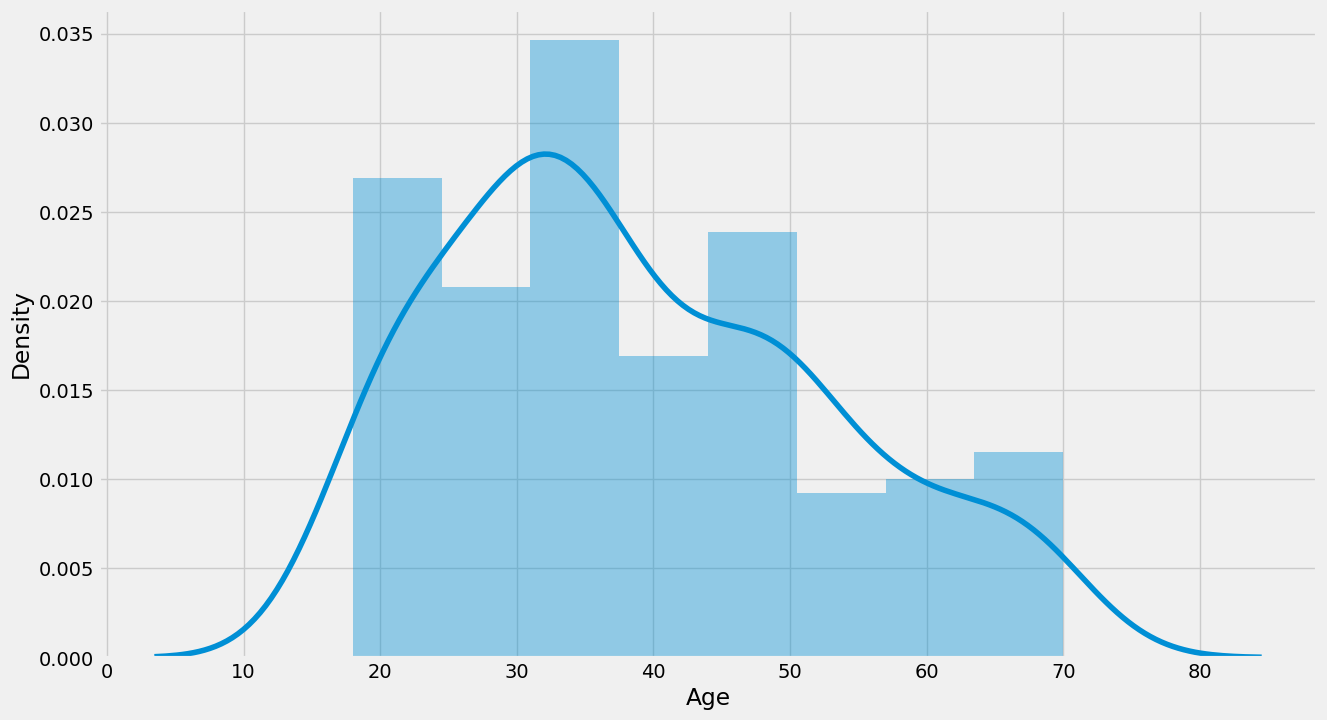

In [175]:
sns.distplot(df['Age'])

<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Distribusi right skewed normal pada usia pelanggan menunjukkan bahwa sebagian besar pelanggan berada pada rentang usia yang lebih muda, sementara ada sejumlah kecil pelanggan yang lebih tua yang menyebabkan ekor distribusi yang panjang di sebelah kanan. Pusat distribusi usia mungkin terletak pada nilai rata-rata atau median yang lebih rendah, mencerminkan bahwa mayoritas pelanggan berada pada kelompok usia yang lebih muda. Skewness positif mencerminkan adanya sejumlah pelanggan yang memiliki usia di atas rata-rata, menciptakan ekor distribusi yang panjang dan memperlihatkan variasi usia yang signifikan

## 3.3 Annual Income

C:\Users\Senna\AppData\Local\Temp\ipykernel_5124\719998892.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Annual Income', ylabel='Density'>

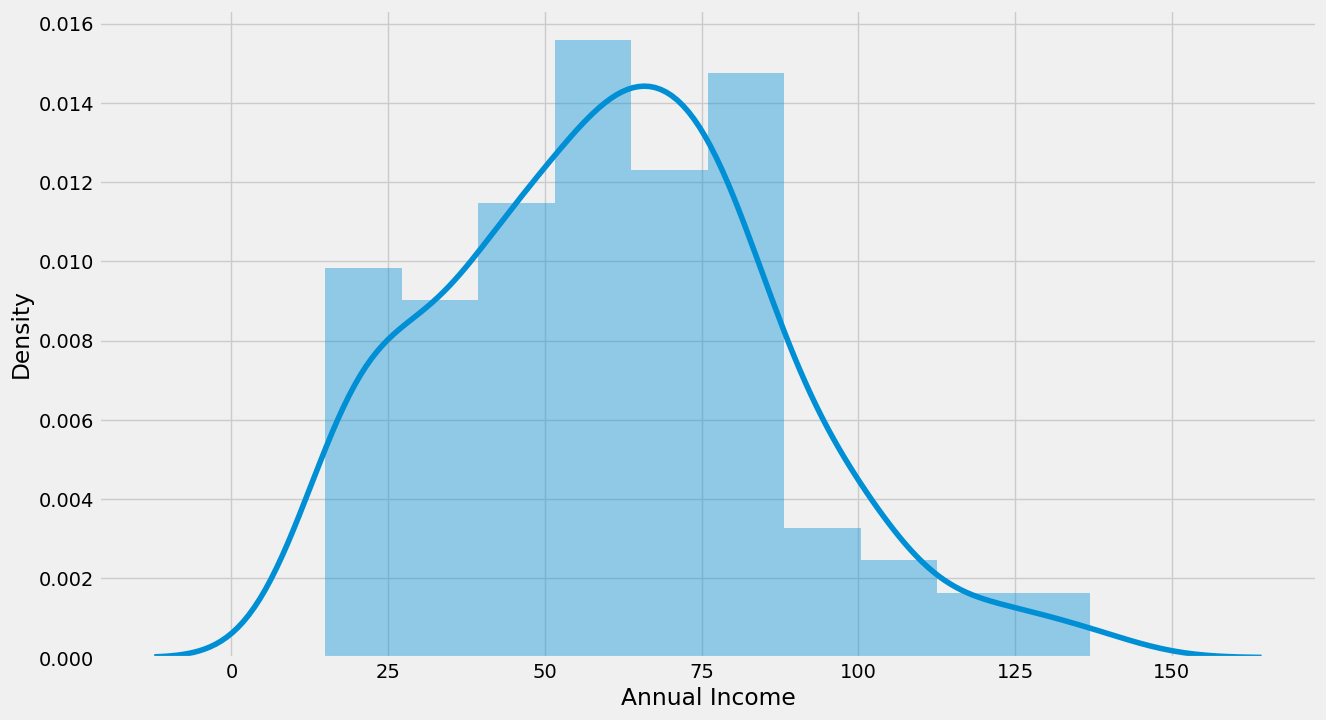

In [176]:
sns.distplot(df['Annual Income'])

<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Distribusi pendapatan tahunan pelanggan menunjukkan kecenderungan normal yang miring ke kanan dengan rentang 55-75, menandakan mayoritas pelanggan berada dalam kisaran tersebut. Skewness positif mengindikasikan sejumlah kecil pelanggan dengan pendapatan yang jauh lebih tinggi. Meskipun sebagian besar memiliki pendapatan seragam, ekor distribusi yang panjang di kanan mencerminkan variasi ekonomi yang signifikan di antara sejumlah pelanggan, menciptakan ketidaksetaraan yang perlu diperhatikan dalam analisis pendapatan.

## 3.4 Spending score

C:\Users\Senna\AppData\Local\Temp\ipykernel_5124\2349628024.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Spending Score', ylabel='Density'>

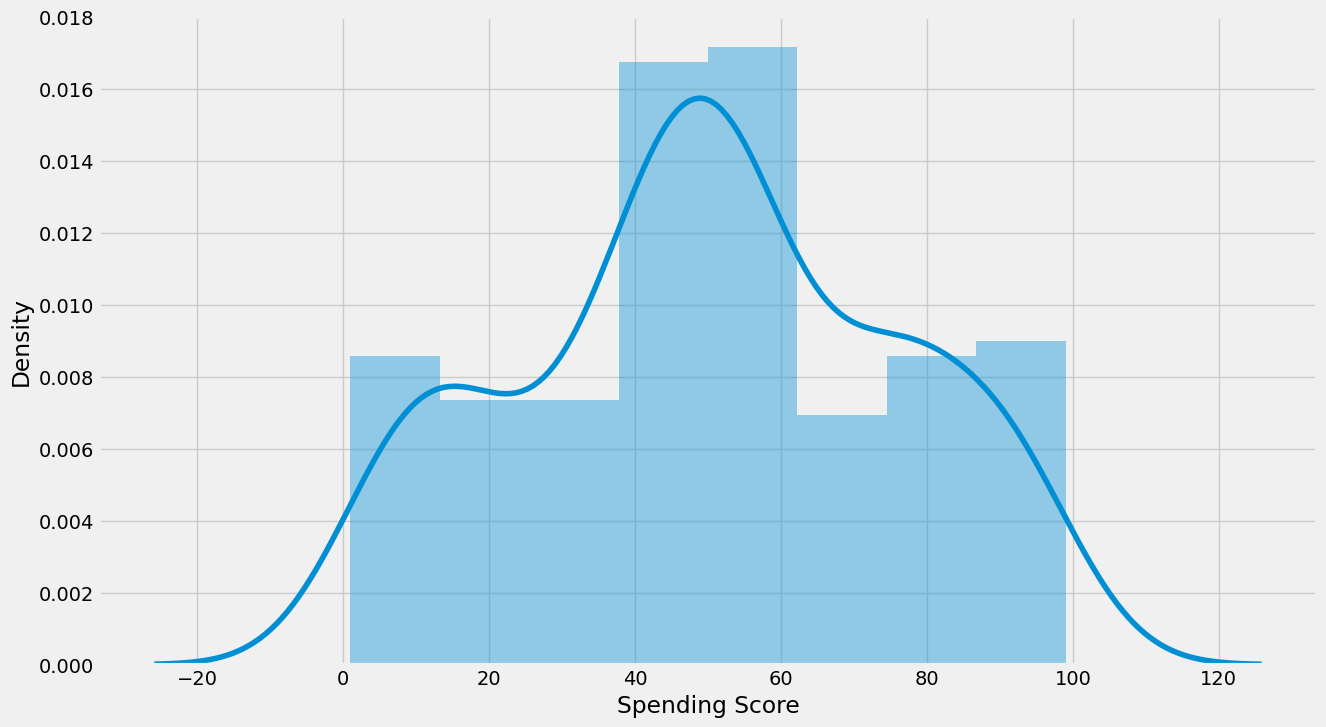

In [177]:
sns.distplot(df['Spending Score'])

<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Spending score pelanggan menunjukkan distribusi normal kasar dengan rentang 0 - 100. Secara umum, sebagian besar pelanggan memiliki skor belanja di sekitar nilai tengah. Distribusi yang mirip dengan kurva normal mencerminkan kecenderungan pelanggan untuk memiliki skor belanja yang mendekati nilai rata-rata, memberikan gambaran yang relatif seimbang dari kebiasaan belanja di antara populasi pelanggan.

## 3.5 Heatmap

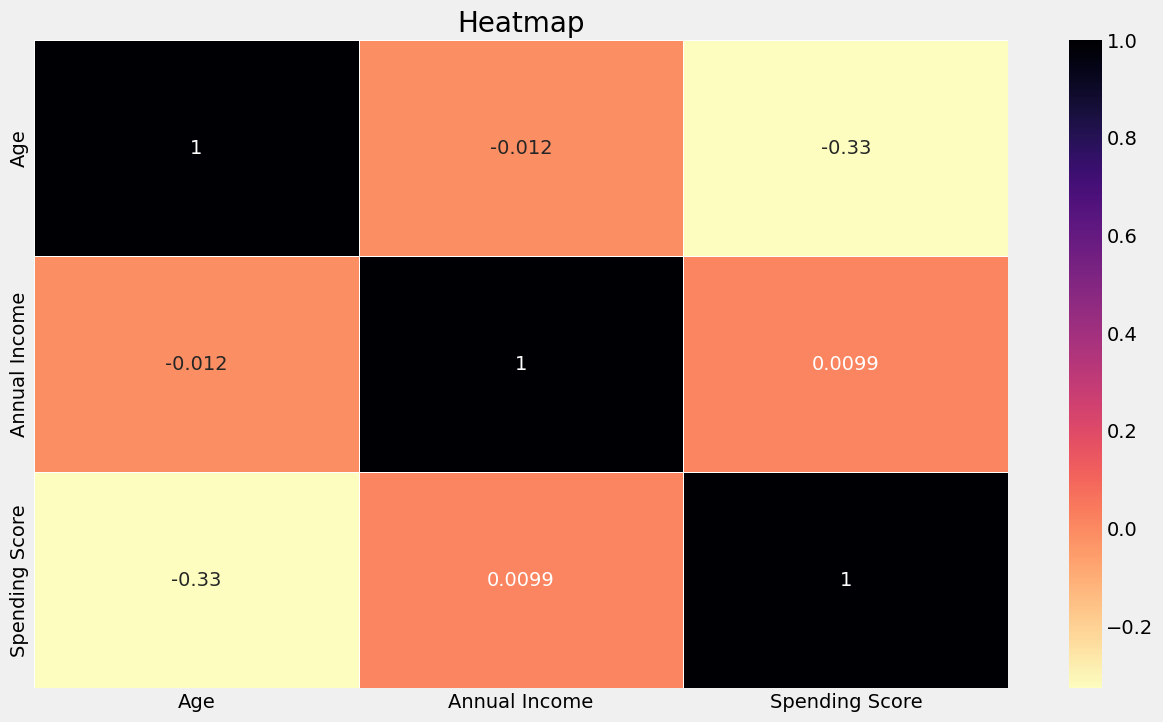

In [178]:
plt.rcParams['figure.figsize'] = (14, 8)
sns.heatmap(df[['Age', 'Annual Income','Spending Score']].corr(), cmap = 'magma_r', annot = True, linewidths=.5)
plt.title('Heatmap', fontsize = 20)
plt.show()

<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Seperti yang dapat kita lihat, tidak ada korelasi yang signifikan antara variable-variable tersebut.

# 4. K-Means Clustering
<hr style="height: 0.5px; border: 0; background-color: #808080">

<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">K-Means adalah salah satu algoritma clustering / pengelompokan data yang bersifat Unsupervised Learning, yang berarti masukan dari algoritma ini menerima data tanpa label kelas. Fungsi dari algoritma ini adalah mengelompokkan data kedalam beberapa cluster.
<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Karakteristik dari algoritma ini adalah :
<br>- Memiliki n buah data
<br>- Input berupa jumlah data dan jumlah cluster (kelompok)
<br>- Pada setiap cluster / kelompok memiliki sebuah centroid yang mempresentasikan cluster tersebut.

<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Secara sederhana algoritma K-Means dimulai dari tahap berikut :
<br>- Pilih K buah titik centroid.
<br>- Menghitung jarak data dengan centroid.
<br>- Update nilai titik centroid.
<br>- Ulangi langkah 2 dan 3 sampai nilai dari titik centroid tidak lagi berubah.

<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Proses pengelompokkan data ke dalam suatu cluster dapat dilakukan dengan cara menghitung jarak terdekat dari suatu data ke sebuah titik centroid. Rumus untuk menghitung jarak tersebut adalah:
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*NMmONdirziiabxp44bVUXQ.png" title="Python Logo"/>

<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">dengan:
<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*afMhEqPfGp5Fz2_6fBd2sA.png" title="Python Logo"/>
    
<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Sedangkah untuk pembaharuan suatu titik centroid dapat dilakukan dengan rumus berikut:
<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*6IAppKZwEW5hzmkKLEo0Eg.png" title="Python Logo"/>

## 4.1 K-Means clustering based on Annual Income

#### Metode Elbow untuk menemukan jumlah Cluster yang optimal

<img src="https://www.megabagus.id/wp-content/uploads/2019/01/WCSS.jpg" title="Python Logo"/>
<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Pengelompokan K-Means Menggunakan Metode Elbow:
WCSS (Within Cluster Sum of Squares) adalah jumlah jarak kuadrat antara setiap titik dan centroid dalam suatu klaster. Ketika kita memplot WCSS dengan nilai K, grafiknya mirip dengan bentuk siku (elbow). Saat jumlah klaster meningkat, nilai WCSS akan mulai menurun. Nilai WCSS terbesar ketika K = 1.

In [179]:
plt.style.use('fivethirtyeight')

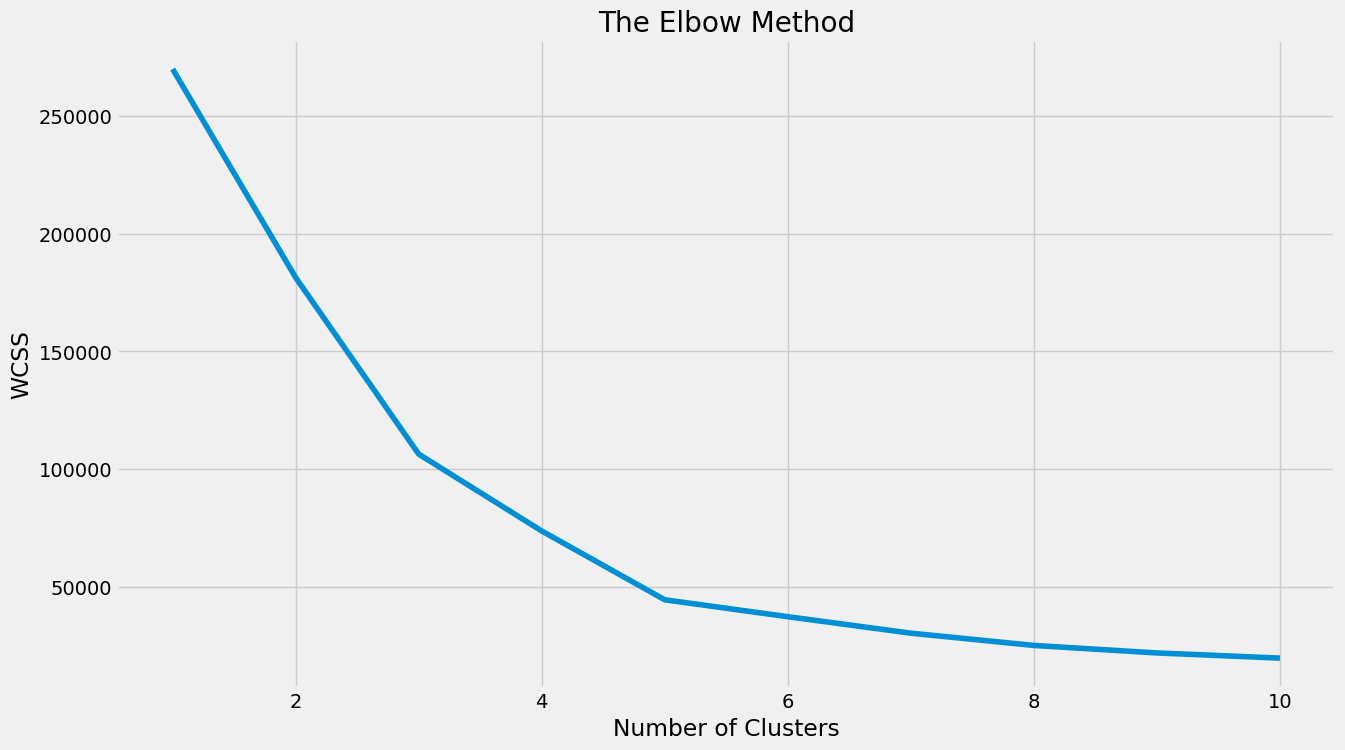

In [185]:
data=df.iloc[:,[3,4]].values
from sklearn.cluster import KMeans
wcss=[] # within cluster sum of square
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_) #inertia_ = to find the wcss value

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Dari gambar di atas, kita dapat melihat bahwa kemiringan paling signifikan terakhir terjadi pada k = 5, oleh karena itu kita akan memiliki 5 cluster untuk Annual Income dan Spending Score.

### 4.1.1 Sebelum Penentuan Kategori

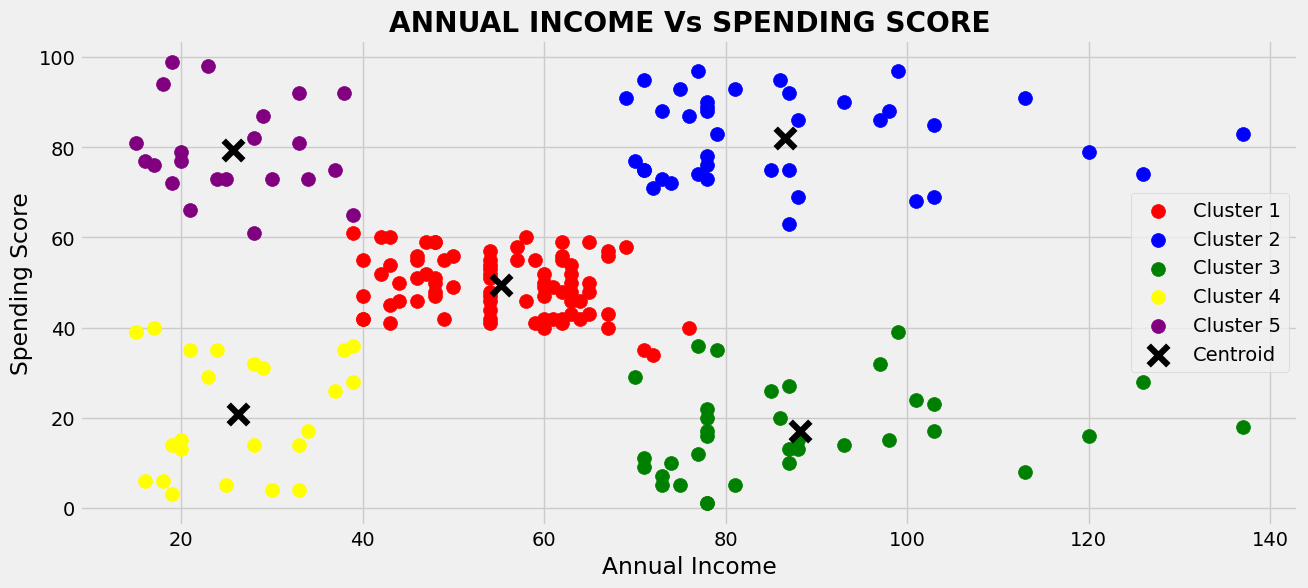

In [181]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(data)

#plotting the the clusters
fig,ax = plt.subplots(figsize=(14,6))
ax.scatter(data[y_kmeans==0,0],data[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
ax.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
ax.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
ax.scatter(data[y_kmeans==3,0],data[y_kmeans==3,1],s=100,c='yellow',label='Cluster 4')
ax.scatter(data[y_kmeans==4,0],data[y_kmeans==4,1],s=100,c='purple',label='Cluster 5')

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=10,c='k',label='Centroid', marker='x', linewidths=20)
plt.title('ANNUAL INCOME Vs SPENDING SCORE', weight='bold')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

<b>Hasil Annual Income Vs Spending Score</b> 
<br>
<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Dari hasil clustering diatas, dapat dilihat bahwa terdapat 5 cluster pelanggan berdasarkan skor pendapatan dan belanja tahunan:</a></p>

<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Cluster 1 : Penghasilan sedang, pengeluaran sedang </a></p>

<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Cluster 2 : Penghasilan tinggi, pengeluaran tinggi </a></p>

<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Cluster 3 : Penghasilan tinggi, pengeluaran rendah </a></p>

<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Cluster 4 : Penghasilan rendah, pengeluaran rendah</a></p>

<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Cluster 5 : Penghasilan rendah, pengeluaran tinggi</a></p>

### 4.1.2 Sesudah Penentuan Kategori

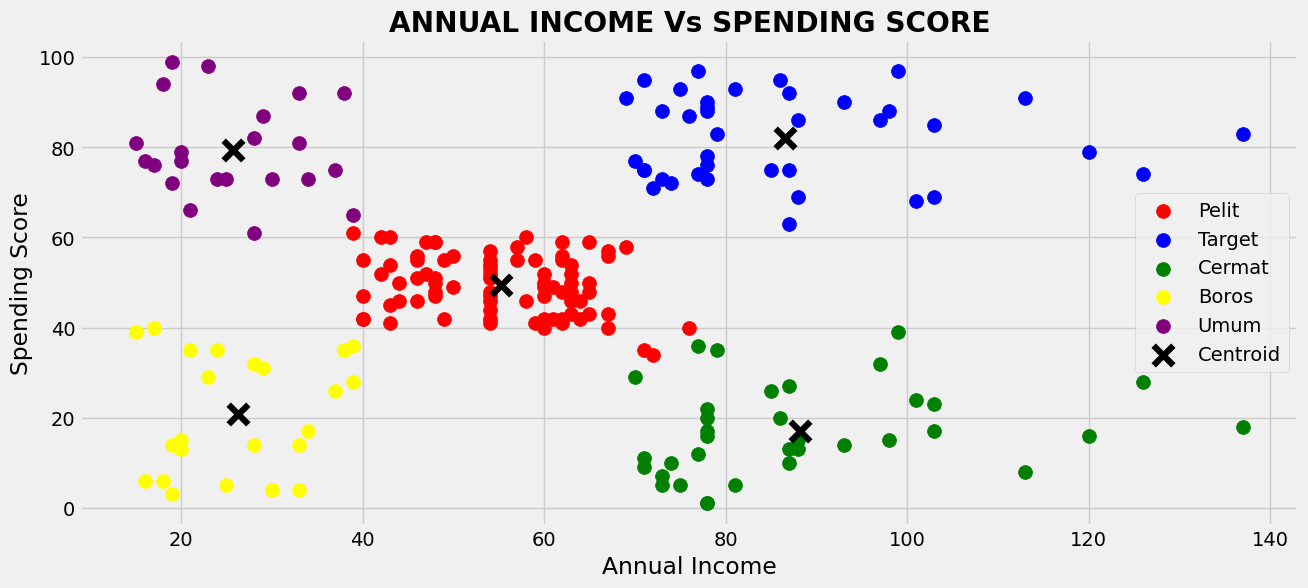

In [188]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(data)

#plotting the the clusters
fig,ax = plt.subplots(figsize=(14,6))
ax.scatter(data[y_kmeans==0,0],data[y_kmeans==0,1],s=100,c='red',label='Pelit')
ax.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=100,c='blue',label='Target')
ax.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=100,c='green',label='Cermat')
ax.scatter(data[y_kmeans==3,0],data[y_kmeans==3,1],s=100,c='yellow',label='Boros')
ax.scatter(data[y_kmeans==4,0],data[y_kmeans==4,1],s=100,c='purple',label='Umum')

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=10,c='k',label='Centroid', marker='x', linewidths=20)
plt.title('ANNUAL INCOME Vs SPENDING SCORE', weight='bold')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

<b>Hasil Annual Income Vs Spending Score</b>
<br>
<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Analisis Pengelompokan ini memberikan kita insight yang sangat jelas tentang berbagai segmen pelanggan di Mall. Jelas ada lima segmen pelanggan yaitu Pelit, Umum, Target, Pemboros, Cermat berdasarkan Annual Income dan Spending Score mereka yang dilaporkan sebagai faktor / atribut terbaik untuk menentukan segmen pelanggan di Mall.</a></p>

## 4.2 K-Means clustering based on Age

#### Metode Elbow untuk menemukan jumlah Cluster yang optimal

<img src="https://www.megabagus.id/wp-content/uploads/2019/01/WCSS.jpg" title="Python Logo"/>
<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Pengelompokan K-Means Menggunakan Metode Elbow:
WCSS (Within Cluster Sum of Squares) adalah jumlah jarak kuadrat antara setiap titik dan centroid dalam suatu klaster. Ketika kita memplot WCSS dengan nilai K, grafiknya mirip dengan bentuk siku (elbow). Saat jumlah klaster meningkat, nilai WCSS akan mulai menurun. Nilai WCSS terbesar ketika K = 1.

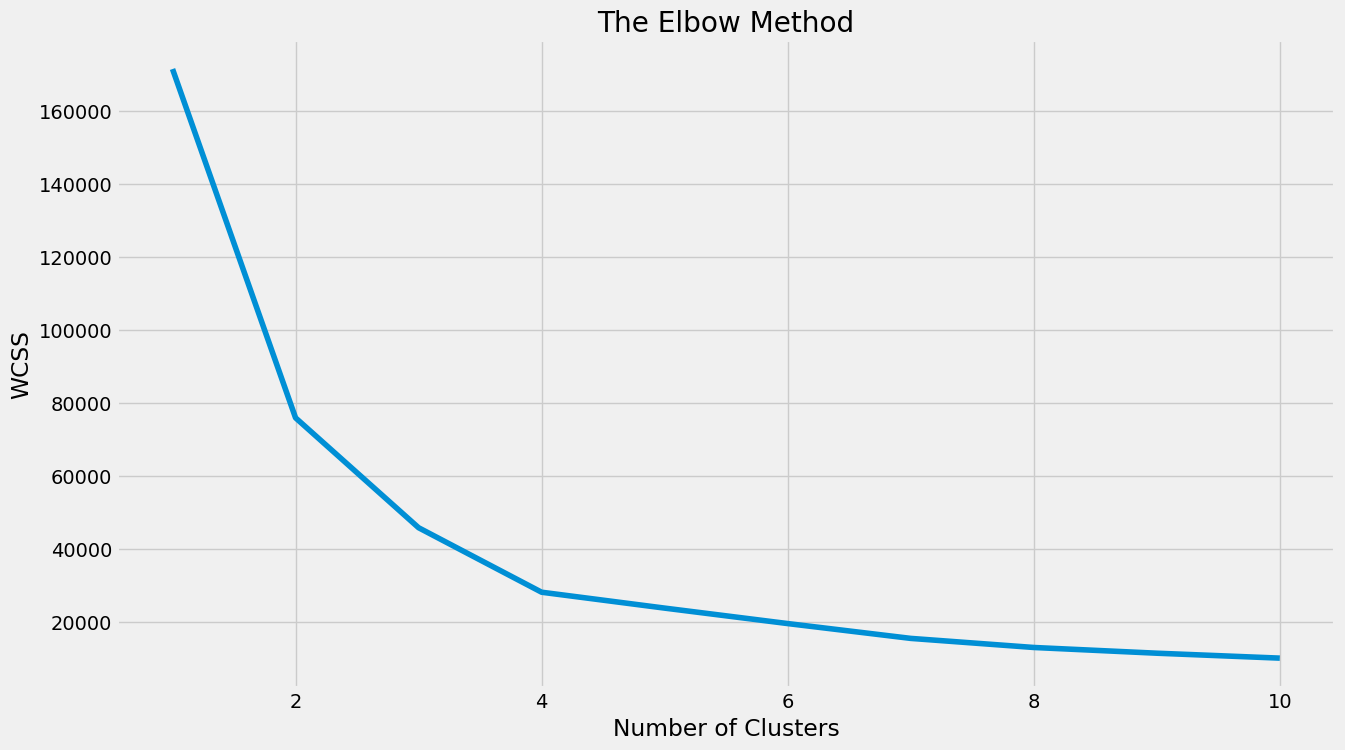

In [190]:
data = df.iloc[:,[2,4]].values


from sklearn.cluster import KMeans

wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Dari gambar di atas, kita dapat melihat bahwa kemiringan paling signifikan terakhir terjadi pada k = 4, oleh karena itu kita akan memiliki 4 cluster untuk Age dan Spending Score.</a></p>

### 4.2.1 Sebelun Penentuan Kategori

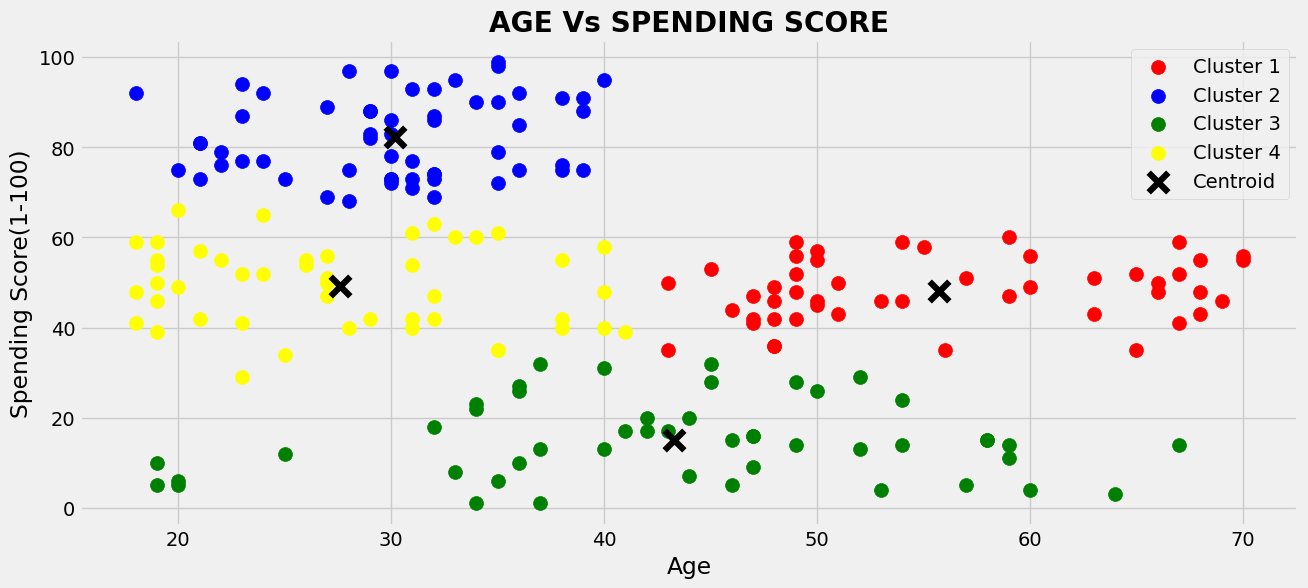

In [191]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(data)

#Plotting the clusters
fig,ax = plt.subplots(figsize=(14,6))
ax.scatter(data[y_kmeans==0,0],data[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
ax.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
ax.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
ax.scatter(data[y_kmeans==3,0],data[y_kmeans==3,1],s=100,c='yellow',label='Cluster 4')

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=10,c='k',label='Centroid', marker='x', linewidths=20)
plt.title('AGE Vs SPENDING SCORE', weight='bold')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

### 4.2.2 Sesudah Penentuan Kategori

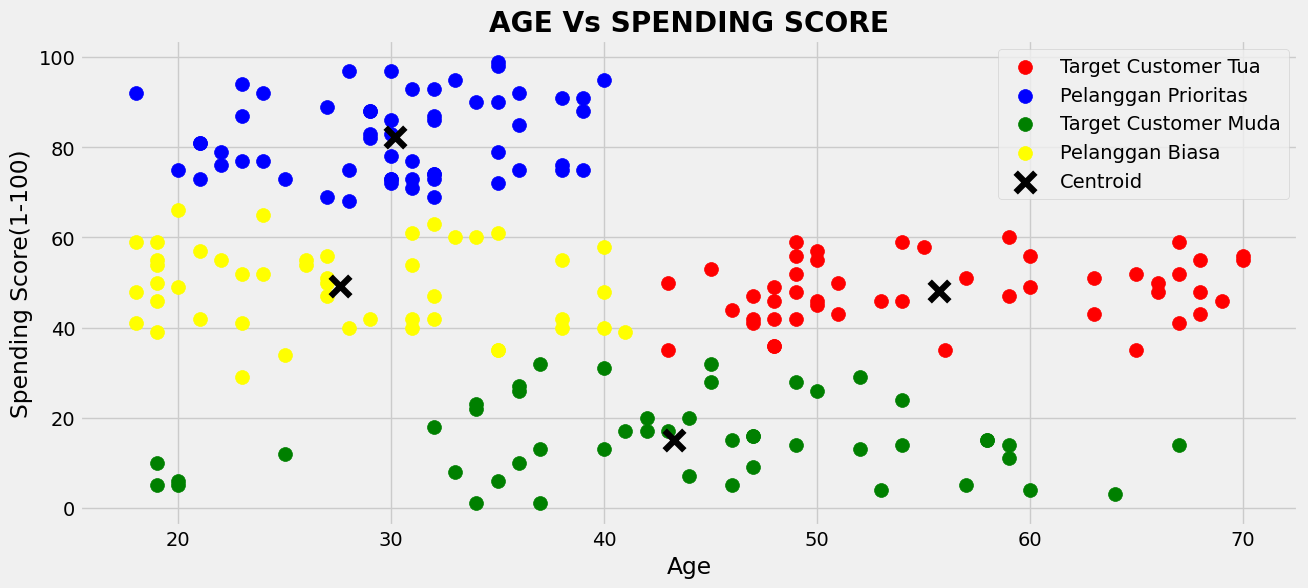

In [192]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(data)

#Plotting the clusters
fig,ax = plt.subplots(figsize=(14,6))
ax.scatter(data[y_kmeans==0,0],data[y_kmeans==0,1],s=100,c='red',label='Target Customer Lansia')
ax.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=100,c='blue',label='Pelanggan Prioritas')
ax.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=100,c='green',label='Target Customer Muda')
ax.scatter(data[y_kmeans==3,0],data[y_kmeans==3,1],s=100,c='yellow',label='Pelanggan Biasa')

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=10,c='k',label='Centroid', marker='x', linewidths=20)
plt.title('AGE Vs SPENDING SCORE', weight='bold')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

<b>Hasil Age Vs Spending Score</b>
<br>
<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Kami mengelompokkannya ke dalam 4 kategori yang berbeda yaitu Pelanggan Biasa, Pelanggan Prioritas, Pelanggan Target Lansia, Pelanggan Target Muda. Kemudian setelah mendapatkan hasilnya, kami dapat membuat strategi dan kebijakan pemasaran yang berbeda untuk mengoptimalkan nilai belanja pelanggan di Mall.</a></p>

# 5. Hasil Akhir
<hr style="height: 0.5px; border: 0; background-color: #808080">

<p style="font-family: Arials; font-size: 16px;text-align: justify;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">Dengan menggunakan pengelompokan K-Means, kami berhasil membentuk klaster yang berbeda berdasarkan fitur yang berbeda. Manajemen pusat perbelanjaan dapat menargetkan klaster dengan skor pengeluaran rata-rata untuk meningkatkan keuntungan mereka dan seharusnya juga menjaga hubungan baik dengan pelanggan premium yang memiliki skor pengeluaran tinggi. Mereka juga seharusnya bekerja untuk menciptakan ide-ide inovatif baru guna meningkatkan pengalaman pelanggan yang memiliki skor pengeluaran yang rendah.</a></p>